# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [3]:
# Importo las librerías de uso general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [5]:
# Importo el dataset de Scikit-Learn. El cual es un conjunto de datos de ejemplo llamado California Housing, 
# que contiene información sobre viviendas en California en los años 90
from sklearn.datasets import fetch_california_housing

# Genero el dataframe (para ser usado en pandas)
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

##### Información de la librería

En la importación del dataset en se debe tener en cuenta que:

* `fetch_california_housing(...)`: Llama a la función para obtener el dataset.
* `return_X_y=True`: Indica que quieres que la función devuelva directamente dos objetos:
    * `X_california`: un DataFrame de pandas que contiene las características (features) del conjunto de datos (como número de habitaciones, ingresos, etc.).
    * `y_california`: un Series de pandas que contiene el objetivo o variable dependiente, que en este caso es el precio medio de la vivienda.
* `as_frame=True`: Indica que quieres que los datos se devuelvan como un DataFrame de pandas y no como arrays de NumPy.

Por otro lado, cuando se llama a la función pero sin argumentos se tiene que:

* Devuelve un objeto tipo `sklearn.utils.Bunch`, que es similar a un diccionario.

Para acceder a los datos, se puede utilizar:

* `california.data`          → contiene las características (X)
* `california.target`        → contiene la variable objetivo (y)
* `california.feature_names` → nombres de las columnas de X
* `california.DESCR`         → descripción del dataset

##### Resumen

| Línea                              | Qué devuelve                                 | Tipo de datos         |
| ---------------------------------- | -------------------------------------------- | --------------------- |
| `X_california, y_california = ...` | `X`, `y` separados                           | DataFrame y Series    |
| `california = ...`                 | Objeto tipo Bunch con `data`, `target`, etc. | `sklearn.utils.Bunch` |


In [7]:
# Imprimo las claves del objeto california, que es un objeto de tipo sklearn.utils.Bunch.
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

##### Significado de cada clave

| Clave             | Contenido                                                                     |
| ----------------- | ----------------------------------------------------------------------------- |
| `data`            | Un array NumPy (o DataFrame si `as_frame=True`) con las características (`X`) |
| `target`          | Un array NumPy (o Series) con la variable objetivo (`y`)                      |
| `frame`           | Un DataFrame de pandas con `data` y `target` combinados (si `as_frame=True`)  |
| `target_names`    | Nombre de la variable objetivo (por ejemplo: `['MedHouseVal']`)               |
| `feature_names`   | Lista con los nombres de las variables predictoras                            |
| `DESCR`           | Una descripción textual del conjunto de datos                                 |
| `data_filename`   | Ruta al archivo local donde se almacenaron los datos de entrada               |
| `target_filename` | Ruta al archivo local del objetivo                                            |


In [9]:
# Veamos algunos de de estas claves. Empecemos con DESCR
print(california['DESCR'])  # descripción del dataset

# Tambien se puede llamar de la forma
# print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [10]:
# Clave feature_names
california['feature_names'] # nombres de los atributos para cada columna de 'data'

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
# Clave data
california['data']           # matriz con los datos de entrada (atributos)

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [12]:
# Clave target
print(california['target']) # vector de valores a predecir

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [13]:
# Dimensiones de dos arrays diferentes del dataset
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

##### Comentario

El atributo `.shape` de un array `NumPy` o de un DataFrame de pandas te dice cuántas filas y columnas tiene:
* (n_filas, n_columnas) para matrices 2D
* (n_filas,) para vectores 1D

En nuestro caso, veamos qué representa cada parte:

`california['data'].shape`
* Devuelve las dimensiones de la matriz de características (`X`)
* Resultado típico: (20640, 8)
    * 20640 observaciones (casas)
    * 8 características (por ejemplo: `MedInc`, `HouseAge`, `AveRooms`, etc.)

`california['target'].shape`
* Devuelve las dimensiones del vector objetivo (y)
* Resultado típico: (20640,)
    * 20640 valores: uno por cada casa, indicando su valor medio

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [16]:
# Importamos la librería train_test_split de Scikit-Learn, que sirve para dividir tus datos en subconjuntos de entrenamiento y prueba (train/test).
from sklearn.model_selection import train_test_split

# Extraemos los datos y la variable objetivo
X, y = california['data'], california['target']

# Divididimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

#  Dimensiones de los arrays de entrenamiento y validación 
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

##### Comentarios

1. #####  Extraer los datos y la variable objetivo
    `X, y = california['data'], california['target']`

* `california['data']` contiene las características (features), es decir, variables como ingresos, habitaciones, etc.
* `california['target']` contiene el objetivo (target), que es el precio medio de la vivienda.

Esto asigna:

* `X`: matriz de entrada (con forma (20640, 8))
* `y`: vector de salida (con forma (20640,))

2. ##### Dividir los datos en entrenamiento y prueba
    `X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)`

* Divide `X` e `y` en dos subconjuntos: uno para entrenar el modelo y otro para probarlo:
    * `X_train`, `y_train`: para ***entrenar*** el modelo.
    * `X_test`, `y_test`: para ***evaluar*** el modelo.
* `train_size=0.8`: Usa el 80% de los datos para entrenamiento, y el 20% restante para prueba.
* `random_state=0`: Fija la semilla aleatoria para que la división siempre sea la misma (reproducibilidad).

El resultado es:
* `X_train`: características de entrenamiento
* `X_test`: características de prueba
* `y_train`: valores objetivo de entrenamiento
* `y_test`: valores objetivo de prueba

3. ##### Verificar dimensiones de los subconjuntos
    `X_train.shape, X_test.shape`

Esto muestra las formas de los conjuntos:
* `X_train.shape`: debería dar (16512, 8) → 80% de 20640 filas
* `X_test.shape`: debería dar (4128, 8) → 20% de 20640 filas

Nota: 16512 + 4128 = 20640, que es el total de datos originales.

In [18]:
# Dimension de los valores objetivos
y.shape

(20640,)

Aquí estamos consultando las dimensiones del array `y`, que contiene los valores objetivo (targets) del conjunto de datos, en este caso, el precio medio de las viviendas en diferentes regiones de California.

| Objeto | Forma (`shape`) | Qué contiene                                  |
| ------ | --------------- | --------------------------------------------- |
| `X`    | `(20640, 8)`    | 20640 muestras con 8 características cada una |
| `y`    | `(20640,)`      | 20640 valores objetivo (precios)              |


In [20]:
# Dimension de los valores de validación
y_test.shape

(4128,)

Aquí estamos preguntado por las dimensiones del subconjunto `y_test`, que contiene los valores reales del precio de las viviendas correspondientes a los datos de prueba (`X_test`).

Nota:
* Como el valor de *y* original tiene forma (20640,), y estámos tomando el 20% para utilizar como prueba, entonces `y_test.shap` devuelve *(4128,)*. Esto significa que `y_test` es un vector unidimensional con 4128 elementos, uno por cada muestra de prueba.


## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

#### 1. ¿De qué se trata el conjunto de datos?
El **California Housing Dataset** proviene de un censo de viviendas realizado en California durante la década de 1990. Contiene información demográfica, geográfica y socioeconómica de distintas regiones (conocidas como block groups) del estado.
Cada fila representa una región, y los datos intentan capturar factores que influyen en el **valor medio de una vivienda** en esa zona.


#### 2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
La variable objetivo es `california['target']`, y representa:

`MedHouseVal`: Valor medio de las viviendas en cada block group, expresado en cientos de miles de dólares (es decir, un valor de 2.5 significa $250,000).

Esta es la variable que se intenta ***predecir*** a partir de los otros atributos.


#### 3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
Hay 8 atributos (features), todos numéricos:
| Atributo     | Significado                                          |
| ------------ | ---------------------------------------------------- |
| `MedInc`     | Ingreso medio por hogar (en decenas de miles de USD) |
| `HouseAge`   | Edad promedio de las viviendas                       |
| `AveRooms`   | Promedio de habitaciones por vivienda                |
| `AveBedrms`  | Promedio de dormitorios por vivienda                 |
| `Population` | Cantidad total de personas en la región              |
| `AveOccup`   | Promedio de ocupantes por vivienda                   |
| `Latitude`   | Latitud geográfica del *block group*                 |
| `Longitude`  | Longitud geográfica del *block group*                |


#### 4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
Aunque esto se puede confirmar solo con un análisis o entrenamiento del modelo, intuitivamente los más influyentes serían:

`MedInc`: Zonas con mayores ingresos tienden a tener viviendas más costosas.

`Latitude` y `Longitude`: Algunas ubicaciones (como la costa o Silicon Valley) tienen precios muy superiores.

`AveRooms`: Puede reflejar el tamaño promedio de las viviendas, lo cual influye en el precio.

`HouseAge`: La antigüedad puede afectar negativamente o positivamente el valor según la zona.

Atributos como `Population` o `AveOccup` probablemente tengan menos influencia directa sobre el precio.


#### 5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc?
Sí, varios aspectos pueden plantear riesgos y sesgos si no se tratan con cuidado:

* ##### Posibles problemas técnicos
  
*Multicolinealidad*: Algunas variables están relacionadas (por ejemplo, `AveRooms` y `AveBedrms`), lo cual puede distorsionar modelos lineales.

*Datos desactualizados*: Son del censo de los años 90.

*Distribución desigual*: Las regiones costeras con altos precios pueden influir de forma desproporcionada.

* ##### Posibles sesgos o dilemas éticos
  
*Geolocalización sensible*: Usar latitud/longitud puede introducir sesgos geográficos o socioeconómicos.

*Discriminación algorítmica*: Si se entrena un modelo con este conjunto de datos y luego se usa para asignar ofrecimiento de préstamos, evaluación de seguros o decisiones inmobiliarias, podría reproducir desigualdades históricas.

*Datos desactualizados*: Los datos son de los 90, y las dinámicas económicas, urbanas y sociales han cambiado radicalmente desde entonces.

*Riesgo de discriminación indirecta*: Si no se usan datos sensibles explícitos (como raza o género).

*Ejemplo de dilema ético*: 
> Si una empresa inmobiliaria usa este modelo para predecir precios y ajustar alquileres, podría aumentar la gentrificación en barrios marginados, expulsando a personas con bajos ingresos.

* #####  Riesgo en el uso futuro

Usar este dataset para predecir precios actuales podría llevar a conclusiones inexactas o decisiones erróneas si no se actualiza o ajusta correctamente.

#### 6. Conclusión
El dataset es muy útil como ejemplo educativo para modelar precios de viviendas, pero su uso en la práctica debe hacerse con responsabilidad. Se deben tener en cuenta actualizaciones de datos, análisis de equidad y validación ética antes de aplicarlo en escenarios reales.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

#### 1. Gráficas 

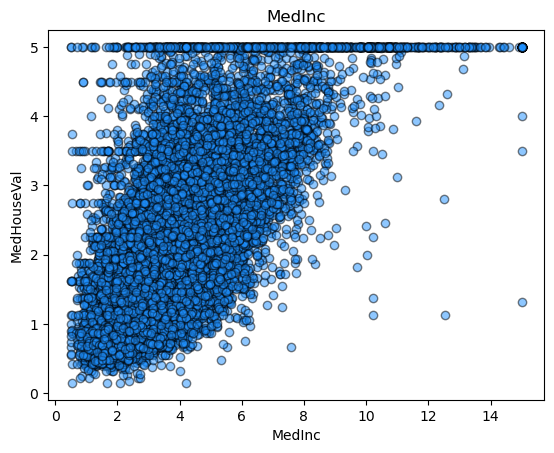

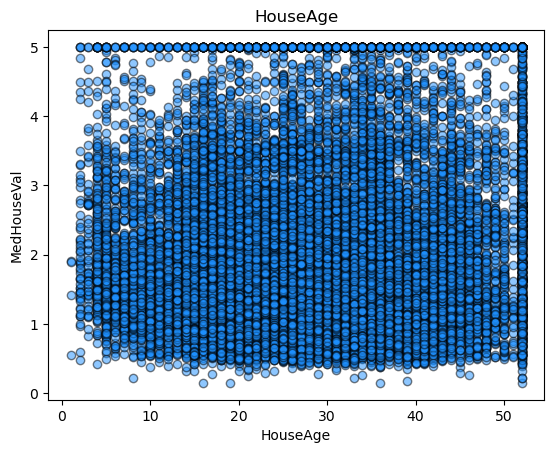

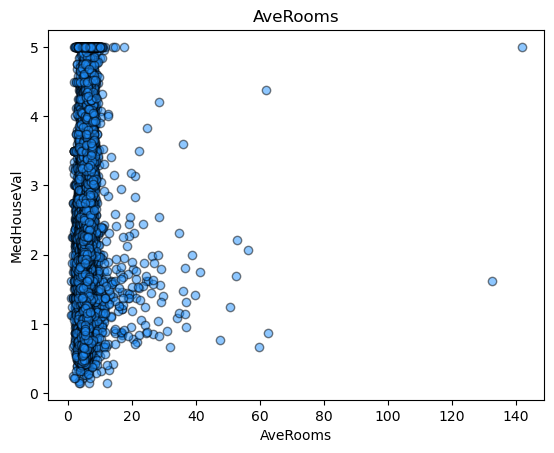

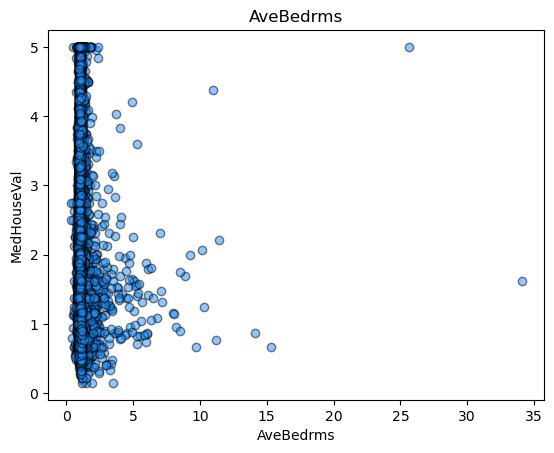

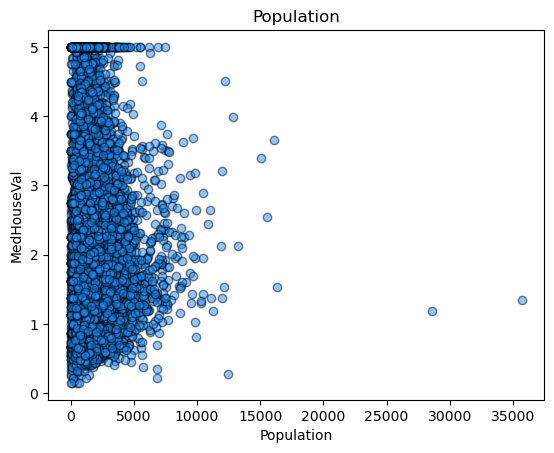

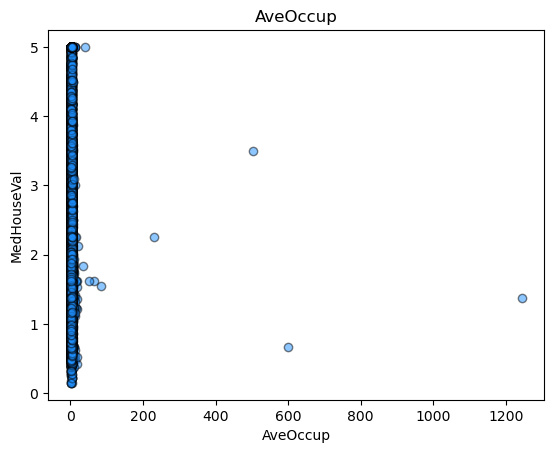

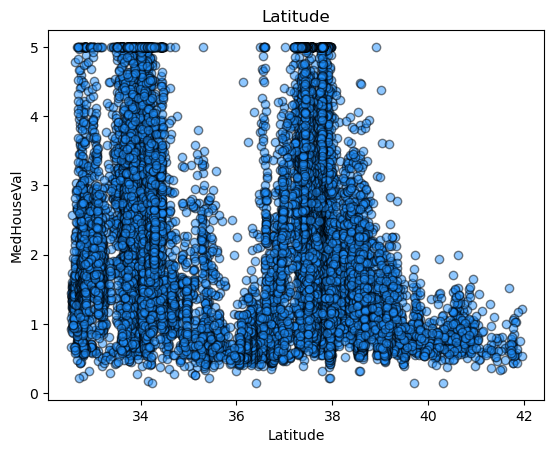

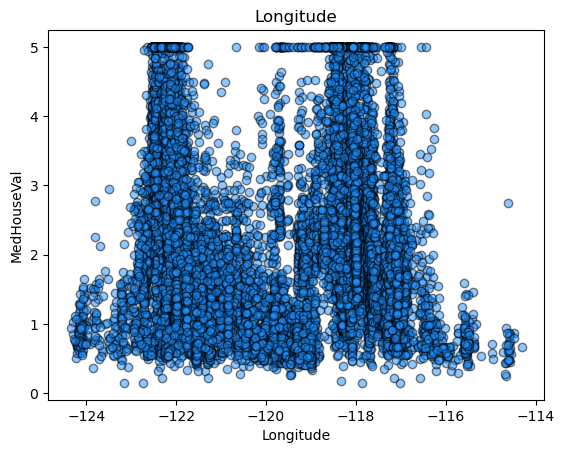

In [26]:
# Para cada atributo, graficar scatter con la variable objetivo
for feature in california['feature_names']:
    selector = (np.array(california['feature_names']) == feature)
    plt.scatter(X[:, selector].flatten(), y, facecolor="dodgerblue", edgecolor="k", alpha=0.5)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("MedHouseVal")
    plt.show()

In [27]:
# Controlo el arreglo de las gráficas anteriores
i = 0
for feature in california['feature_names']:
    selector = (np.array(california['feature_names']) == feature)
    california['feature_names'][i] == feature
    print(california['feature_names'][i] == feature)
    i = i + 1

True
True
True
True
True
True
True
True


#### Comentarios

`california['feature_names']` es una lista (o arreglo) con los nombres de las características (atributos) del dataset.

> Por ejemplo, `california['feature_names'][1]` accede al segundo elemento de esa lista (índice 1 porque Python empieza en 0). En este caso sería `HouseAge`. Aquí, `feature` es una variable que contiene un nombre de atributo, por ejemplo `MedInc` o `HouseAge`.

Entonces, la expresión `california['feature_names'][1] == feature` compara si el nombre del segundo atributo (en la lista) es igual al valor de `feature`. Y devuelve:
- `True` si coinciden.
- `False` si no.

#### ¿Para qué sirve esto?

El dataset `X = california['data']` es un arreglo NumPy con todas las características en columnas, y cada columna corresponde a un atributo según el orden de `california['feature_names']`.

Para extraer sólo la columna de un atributo en particular, por ejemplo `HouseAge`, necesitamos saber en qué posición está ese atributo (índice) y seleccionar esa columna en `X`.

Usar un array booleano como selector permite hacer esa selección fácilmente:

`X[:, selector]`

* Aquí selector es un array booleano del tipo `[False, True, False, ...]`.
* `X[:, selector]` extrae todas las filas y sólo la(s) columna(s) donde selector es `True`.

Como sólo hay un `True` en el array, selecciona sólo la columna correspondiente a `HouseAge`.

#### Resumen

* La comparación `california['feature_names'][i] == feature` es una forma puntual para chequear si un atributo específico es igual a `feature`.
* En cambio, `np.array(california['feature_names']) == feature` genera un vector booleano para seleccionar la columna correspondiente en `X`.
* Esto se usa para poder graficar o trabajar sólo con ese atributo específico sin necesidad de conocer de antemano el índice.

#### 2. Análisis visual de los atributos observados en las gráficas 

* `MedInc` (Ingreso medio)
    * Relación clara, positiva y creciente: a mayor ingreso medio, mayor valor medio de la vivienda.
    * Se observa una tendencia muy definida, lo que lo convierte en un ***atributo fuertemente predictivo***.
* `Latitude`
    * Relación no lineal: los valores de las casas más altas se concentran en ciertas latitudes.
    * Podría reflejar el efecto geográfico (por ejemplo, cercanía a zonas costeras del sur de California).
* `Longitude`
    * Similar a Latitude, pero muestra una caída hacia el oeste (menores valores a medida que se aleja de la costa).
    * Es útil pero con patrones más ruidosos que en MedInc.
* `HouseAge`
    * Tendencia suave: el valor de la vivienda aumenta levemente con la edad hasta cierto punto.
    * Patrón visible pero no muy fuerte.
* `AveRooms` (promedio de habitaciones)
    * Relación poco clara. Hay una gran dispersión.
    * Algunas correlaciones positivas en cierto rango, pero también muchos valores extremos.
* `AveBedrms` (promedio de dormitorios)
    * Relación negativa tenue (a más dormitorios, menor valor), aunque con mucho ruido.
    * No parece muy informativo directamente.
* `Population`
    * Alta dispersión. No se observa una relación clara.
    * Muy poco predictivo a simple vista.
* `AveOccup` (promedio de ocupantes por hogar)
    * Patrón disperso y ruidoso. Ligera tendencia a menor valor con más ocupantes, pero poco definida.
    * Posiblemente útil si se combina con otros atributos, pero débil por sí solo.

- ¿Qué atributos parecen más informativos a ojo?
    * Claramente, `MedInc` destaca como el más informativo.
    * También hay patrones interesantes en `Latitude` y `Longitude` (por efectos geográficos).
    * `HouseAge` aporta algo de información, aunque debe complementarse con los atributos anteriores.

#### 3. Atributos más informativos en orden de importancia (a ojo)

1. `MedInc`
2. `Latitude`
3. `Longitude`
4. `HouseAge`

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

#### 1. Elección del atributo

In [33]:
# Eleccion del atributo MedInc por tener mejores carateristicas predictivas
feature = 'MedInc'  # selecciono el atributo 'MedInc'

# Genero el conjunto de puntos de entrenamiento y de validacion
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]

# Observo la forma
X_train_f.shape, X_test_f.shape

((16512, 1), (4128, 1))

In [34]:
# Veamos un elemento del objeto
X_train_f[1]

array([4.3898])

#### 2. Regresión lineal

In [36]:
# Importo la librería necesria para aplicar la regrsion lineal
from sklearn.linear_model import LinearRegression

# Importo la librería necesaria para calcular el error cuadratico medio
from sklearn.metrics import mean_squared_error, r2_score

# Instanciar y entrenar modelo
model = LinearRegression()
model.fit(X_train_f, y_train)

LinearRegression()

#### 3. Error cuadratico medio

In [38]:
# Predicciones
y_train_pred = model.predict(X_train_f)
y_test_pred  = model.predict(X_test_f)

# Error cuadrático medio
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# Imprimo los resultados
print(f"Error cuadrático medio (MSE) del entrenamiento: {mse_train:.4f}")
print(f"Error cuadrático medio (MSE) de prueba: {mse_test:.4f}")

Error cuadrático medio (MSE) del entrenamiento: 0.6961
Error cuadrático medio (MSE) de prueba: 0.7215


In [39]:
# Calculo el coeficiente R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

# Imprimo los resultados
print(f"Coeficiente R² del entrenamiento: {r2_train:.4f}")
print(f"Coeficiente R² de prueba: {r2_test:.4f}")

Coeficiente R² del entrenamiento: 0.4799
Coeficiente R² de prueba: 0.4467


El R² nos dice qué tan bien se ajusta el modelo a los datos (1.0 es perfecto, 0.0 es un modelo que no aprende nada).

##### Observación: Análisis complementario

Hemos analizado solo un atributo, y hemos elegido `MedInc`. Sin embargo, podemos inspeccionar el resto. Debe tenerse en cuenta que un modelo de regresión lineal no predice una salida por atributo, sino una salida general a partir de todos los atributos. Por eso no se puede calcular directamente un "error por atributo" como si cada atributo tuviera su propia predicción. Sin embargo, sí puede hacer un análisis del impacto individual de cada atributo.


In [42]:
# Cargamos el dataset
feature_names = california['feature_names']

# Generamos la lista para guardar resultados
resultados = []

# Recorremos cada atributo (columna)
for i, feature in enumerate(feature_names):
    # Genero los datos a entrenar
    X_train_feature = X_train[:, i].reshape(-1, 1)
    X_test_feature = X_test[:, i].reshape(-1, 1)

    # Creamos y entrenamos el modelo 
    modelfeature = LinearRegression()
    modelfeature.fit(X_train_feature, y_train)

    # Predecimos el modelo
    y_pred_test = modelfeature.predict(X_test_feature)
    y_pred_train = modelfeature.predict(X_train_feature)

    # Calulamos el error cuadratico medio y R²
    mse_train_feature = mean_squared_error(y_train, y_pred_train)
    mse_test_feature = mean_squared_error(y_test, y_pred_test)
    r2_feature = r2_score(y_test, y_pred_test)

    # Guardamos resultados en un diccionario
    resultados.append({
        'Atributo': feature,
        'MSE de entrenamiento': mse_train_feature,
        'MSE de validación': mse_test_feature,
        'R²': r2_feature
    })

# Creamos el DataFrame y mostramos ordenado por R²
df_resultados = pd.DataFrame(resultados)
df_ordenado = df_resultados.sort_values(by='R²', ascending=False)

# Imprimimos los resultados en orden
print(df_ordenado)

     Atributo  MSE de entrenamiento  MSE de validación        R²
0      MedInc              0.696068           0.721498  0.446685
6    Latitude              1.311117           1.274987  0.022215
2    AveRooms              1.306455           1.278284  0.019687
1    HouseAge              1.323200           1.290768  0.010113
3   AveBedrms              1.335731           1.300468  0.002674
7   Longitude              1.335380           1.302262  0.001298
4  Population              1.337392           1.304249 -0.000225
5    AveOccup              1.336899           1.312417 -0.006490


***Nótese que***:
* Se utiliza el índice *i* para seleccionar la columna correspondiente a `X_train` y `X_test`.
* Se utiliza `.reshape(-1, 1)` porque `scikit-learn` espera matrices de 2 dimensiones para las características.

#### 4. Grafico del modelo resultante

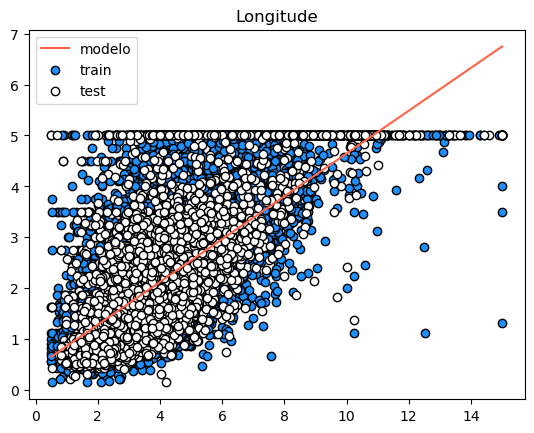

In [45]:
# Calculo en intervalo de puntos
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

# Recta de prediccion
plt.plot(x, model.predict(x), color="tomato", label="modelo")

# Puntos azules para los puntos del entrenamiento
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")

# Puntos blancos para los puntos de testeo
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

# Tilulo y leyenda
plt.title(feature)
plt.legend()
plt.show()

#### 5. Interpretación
* Tendencia clara: el modelo capta que a mayor ingreso medio, mayor valor medio de la vivienda.
* Simplicidad: es un modelo muy simple con solo un atributo, por lo que es fácil de interpretar.
* Limitaciones:
    * Aunque se ajusta razonablemente, el ***error es relativamente alto***, indicando que hay mucho más que influye en el precio de las viviendas.
    * La dispersión en los puntos sugiere que hay ***factores importantes no considerados***, como ubicación, antigüedad, tamaño, etc.
* Generalización razonable: el ECM en prueba es apenas mayor que el de entrenamiento, lo cual indica que el modelo ***no sobreajusta*** (no hay overfitting), aunque ***subajusta*** (underfitting) por su simplicidad.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

#### 0. Cálculos preliminares

Por razones de simplicidad y mayor grado de control del procedimiento, primero veamos el caso particular para un solo grado de polinomio aplicado al atributo anterior. Luego, generamos para diferentes grados.

In [50]:
# Primero, controlemos que la forma de los datos sean las correctas para ser utilizadas en scikit-learn
X_train_f.shape, X_test_f.shape

((16512, 1), (4128, 1))

In [51]:
# Importo las librerías de scikit-learn que utilizaremos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Genero el polinomio de grado n=5
degree = 5
polinomial_f = PolynomialFeatures(degree) 
polinomial_f.fit(X_train_f)             
# nota: no necesita y_train

PolynomialFeatures(degree=5)

In [52]:
#Controlomeos nuevamente la forma de los datos
X_train_f.shape

(16512, 1)

In [53]:
# A continuación debemos convertir estos datos de entreamiento en carácteristicas polinómicas
X_train_f2 = polinomial_f.transform(X_train_f)

# Este nuevo conjunto de datos tiene una forma diferente, del orden del polinomio.
X_train_f2.shape

(16512, 6)

In [54]:
# Primero instanciamos y entrenamos (el bias ya esta como feature). Luego generamos el modelo, el cual debe ser polinomiomico.
linear_f = LinearRegression(fit_intercept=False) 
model = make_pipeline(polinomial_f, linear_f)
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression(fit_intercept=False))])

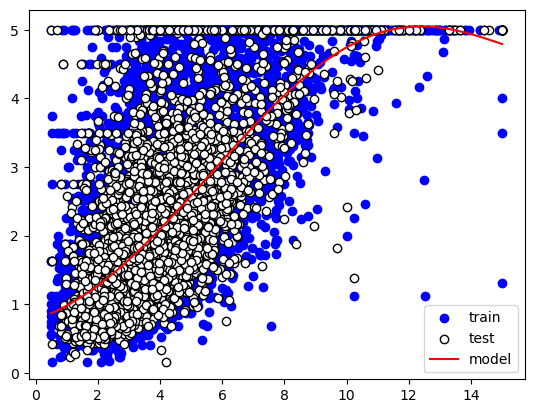

In [55]:
# Genero el gráfico de la interpolación polinómica
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

#### 1. Regresión Polinomial

Primero, entrenamos con diferentes regresiones polinomiales para diferentes grados de polinomios, y luego validamos. Además, calculamos los errores cuadráticos.

In [58]:
# Generamos el conjunto de ordenes de los polinomios de interes
maxdegree = 14
degrees = list(range(1,maxdegree+1))

# Generamos la lista para guardar resultados
train_errors = []
test_errors  = []
dif_errors   = []
polynomials_results = []

# Recorremos cada polinomio
for degree in degrees:
    # Genero el polinomio de grado n
    polynomial_degree = PolynomialFeatures(degree)
    polynomial_degree.fit(X_train_f)  

    # Luego, instanciamos, entrenamos y Luego generamos el modelo.
    linear_degree = LinearRegression(fit_intercept=False) 
    polynomialmodel = make_pipeline(polynomial_degree, linear_degree)
    polynomialmodel.fit(X_train_f, y_train)

    # Predecimos el modelo
    y_pred_test = polynomialmodel.predict(X_test_f)
    y_pred_train = polynomialmodel.predict(X_train_f)

    # Calulamos el error cuadratico medio
    mse_train_degree = mean_squared_error(y_train, y_pred_train)
    mse_test_degree = mean_squared_error(y_test, y_pred_test)

    # Guardamos resultados
    polynomials_results.append({
        'Degree': degree,
        'MSE training': mse_train_degree,
        'MSE test': mse_test_degree,
        'MSE difference': mse_test_degree-mse_train_degree
    })
    train_errors.append(mse_train_degree)
    test_errors.append(mse_test_degree)
    dif_errors.append(mse_test_degree-mse_train_degree)

# Creamos el DataFrame y mostramos ordenado MSE
df_polynomials_results = pd.DataFrame(polynomials_results)
df_polynomials_ordered = df_polynomials_results.sort_values(by='MSE test', ascending=True)

# Imprimimos los resultados en orden
print(df_polynomials_ordered)

# Elegir el mejor modelo (menor error en entrenamiento y validacion)
best_train_degree = degrees[np.argmin(train_errors)]
best_test_degree  = degrees[np.argmin(test_errors)]
best_dif_degree   = degrees[np.argmin(dif_errors)]
print(f"\nMejor grado según error en entrenamiento: {best_train_degree}")
print(f"Mejor grado según error en validacion: {best_test_degree}")
print(f"Mejor grado según error en la diferencia: {best_dif_degree}")

    Degree  MSE training  MSE test  MSE difference
8        9      0.673550  0.702073        0.028523
7        8      0.673553  0.702104        0.028551
9       10      0.673334  0.702400        0.029066
6        7      0.673715  0.702596        0.028881
10      11      0.673244  0.702928        0.029684
5        6      0.676087  0.706768        0.030680
4        5      0.678005  0.707972        0.029967
3        4      0.678052  0.708043        0.029991
2        3      0.678214  0.708136        0.029921
1        2      0.689486  0.717407        0.027922
0        1      0.696068  0.721498        0.025430

Mejor grado según error en entrenamiento: 11
Mejor grado según error en validacion: 9
Mejor grado según error en la diferencia: 1


A partir de los resultados anteriores, podemos observar que:
* Del polinomio de grado *1* al polinomio de grado *14* los valores de `MSE training` y `MSE test` son similares.
* El polinomio de grado *8* presenta el menor valor para `MSE training`.
* El polinomio de grado *8* presenta el menor valor para `MSE test`.
* El polinomio de grado *1* presenta el menor valor para `MSE difference`.

#### 2. Errores cuadráticos medios

Gráfico de los errores cuadráticos medios (MSE) en términos del grado del polinomio

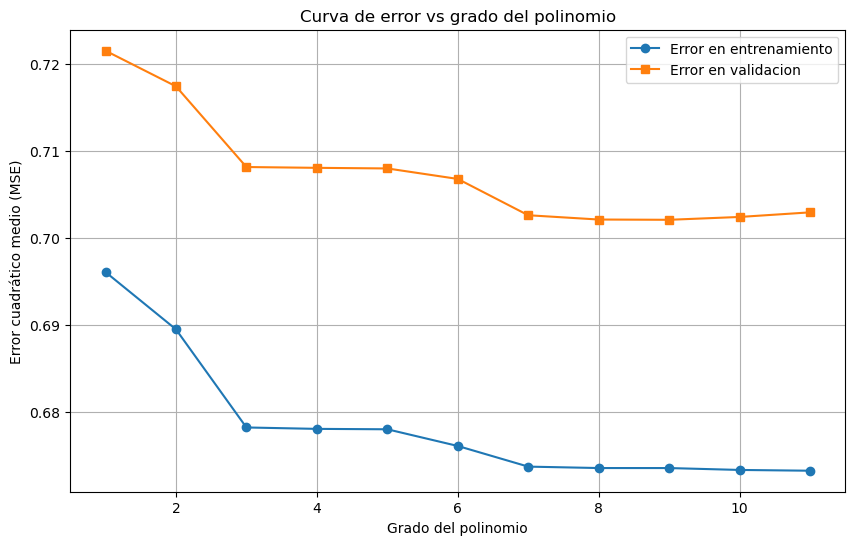

In [62]:
# Graficas de las curvas de MSE
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, label='Error en entrenamiento', marker='o')
plt.plot(degrees, test_errors, label='Error en validacion', marker='s')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Curva de error vs grado del polinomio')
plt.legend()
plt.grid(True)
plt.show()

#### 3. Sobreajuste.

* ¿Dónde comienza el sobreajuste?
    1. En los primeros grados (1 a 3), el error en test disminuye, indicando un mejor ajuste.
    2. A partir de cierto grado (5 o más), el error en test comienza a aumentar, mientras que el de entrenamiento sigue bajando: eso es sobre ajuste. El modelo se ajusta demasiado a los datos de entrenamiento y pierde capacidad de generalización. Sin embargo, en este conjunto de datos se observa una disminución progresiva del error al aumentar el grado del polinomio.
    3. La brecha entre error de entrenamiento y test se mantiene pequeña, lo cual indica que no hay sobreajuste severo, aunque a partir de grado *6* la mejora en test es mínima.
    4. El modelo sigue bien la tendencia general sin oscilaciones artificiales, lo que sugiere un ajuste suave y adecuado.
* ¿Qué modelo es el mejor?
    1. El mejor modelo es el que tiene menor MSE en test. En este caso es el de grado 9.
* Comentario sobre el modelo obtenido:
    1. El modelo polinomial de grado 9 captura adecuadamente la relación no lineal entre `'MedInc'` y el valor medio de la vivienda (`target`). Es interpretable y generaliza bien.
    2. Grados altos llevan a curvas demasiado oscilantes, que no representan la tendencia real de los datos y sobreajustan el ruido.



#### 4. Mejor modelo que ajusta al MSE

Grafico el modelo que mejor ajusta al MSE de validacion

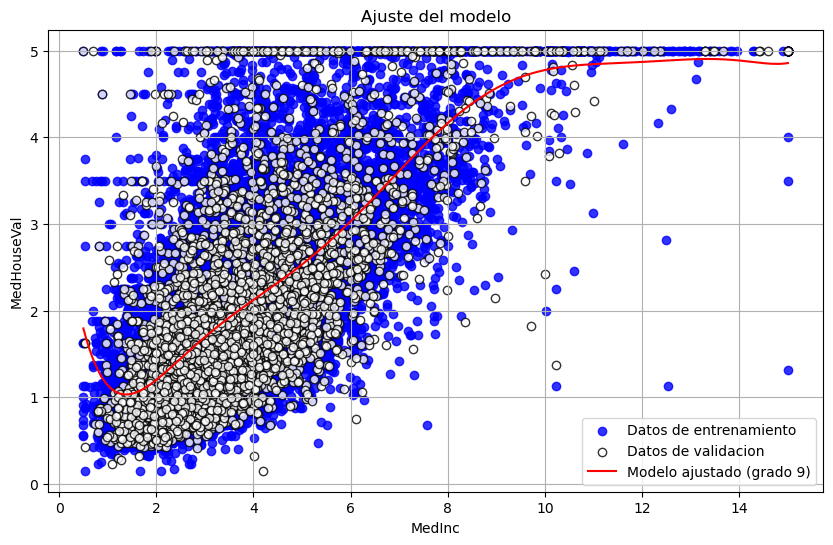

In [67]:
# Genero el modelo
bestpolynomial = PolynomialFeatures(best_test_degree)
bestpolynomial.fit(X_train_f)
bestlinear = LinearRegression(fit_intercept=False) 
bestpolynomialmodel = make_pipeline(bestpolynomial, bestlinear)
bestpolynomialmodel.fit(X_train_f, y_train)

# Predecimos el modelo
y_plot = bestpolynomialmodel.predict(X_test_f)

# Calculo en intervalo de puntos
x_initial = min(np.min(X_train_f), np.min(X_test_f))
x_final = max(np.max(X_train_f), np.max(X_test_f))
x_plot = np.linspace(x_initial, x_final, 500).reshape(-1, 1)

# Graficar puntos junto al modelo ajustado
plt.figure(figsize=(10,6))
plt.scatter(X_train_f, y_train, color='blue', label='Datos de entrenamiento', alpha=0.8)
plt.scatter(X_test_f, y_test, color='white', edgecolor="k", label='Datos de validacion', alpha=0.8)
plt.plot(x_plot, bestpolynomialmodel.predict(x_plot), color="red", label="Modelo ajustado (grado {})".format(best_test_degree))
plt.xlabel('MedInc')
plt.ylabel("MedHouseVal")
plt.title('Ajuste del modelo')
plt.legend()
plt.grid(True)
plt.show()

#### 5. Mejor modelo que ajusta al MSE

El modelo polinomial de grado *9* resultó ser el más preciso en términos de error cuadrático medio sobre el conjunto de evaluación. Aunque se podría pensar que un grado tan alto generaría sobreajuste, en este caso la mejora es progresiva y no hay un salto en el error de test, lo que sugiere que el modelo generaliza correctamente.

El modelo logra capturar adecuadamente la relación no lineal entre el ingreso medio por hogar (`MedInc`) y el valor medio de las viviendas (`MedHouseVal`). Visualmente, la curva ajustada refleja una tendencia creciente con suavidad, sin introducir oscilaciones extremas.

En resumen, el modelo de grado *9* proporciona un ajuste suficientemente flexible sin perder capacidad de generalización, lo cual lo convierte en una elección apropiada para modelar esta variable.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

#### 1. Seleccion de atributos

Según lo observado en el Ejercicio 2, algunos de los atributos más informativos para predecir `MedHouseVal` fueron:
* `MedInc` (ingreso medio)
* `Latitude` (latitud)
* `AveRooms` (promedio de habitaciones por casa)

#### 2. Regresion polinomial

Aplicamos regresion polinomial a varios atributos (tresn en este caso)

In [75]:
# Determino los atributos a utilizar
features = np.array(california['feature_names'])
selector = (features == 'MedInc') | (features == 'Latitude') | (features == 'AveRooms')

# Genero los arregos a entrenar
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]

# Analizo la forma de los arreglos
print('Formato de los conjuntos de entrenamiento: ', X_train_fs.shape, 'y test: ', X_test_fs.shape)

Formato de los conjuntos de entrenamiento:  (16512, 3) y test:  (4128, 3)


Aquí observamos que los conjuntos tienen 3 columnas, debido a los 3 atributos seleccionados. Sin embargo las filas son las mismas que en el ejercicio anterior. A continuación entrenamos estos atributos con regresiones para diferentes grados de polinomios (hasta grado *7*). Además, calculamos los errores cuadráticos (*MSE*).

In [77]:
# Inicio las listas y genero el arreglo con los grados de libertad de los polinomios  
maxdegree = 6
degrees = list(range(1,maxdegree+1))
errores_train = []
errores_test = []
atributos_resultados = []

# Recorremos cada polinomio
for degree in degrees:
    # Genero el polinomio de grado n
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_fs)
    X_test_poly = poly.transform(X_test_fs)

     # Instanciamos, entrenamos y generamos el modelo.
    modelo = LinearRegression()
    modelo.fit(X_train_poly, y_train)

    # Predecimos el modelo
    y_train_pred = modelo.predict(X_train_poly)
    y_test_pred = modelo.predict(X_test_poly)

    # Calulamos el error cuadratico medio
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Guardamos los errores de entrenamiento y validacion
    errores_train.append(mse_train)
    errores_test.append(mse_test)

    # Guardamos resultados
    atributos_resultados.append({
        'Degree': degree,
        'MSE training': mse_train,
        'MSE test': mse_test
    })

# Creamos el DataFrame y mostramos ordenado MSE
df_atributos_resultados = pd.DataFrame(atributos_resultados)
df_atributos_ordenados = df_atributos_resultados.sort_values(by='MSE test', ascending=True)

# Imprimimos los resultados en orden
print(df_atributos_ordenados)

   Degree  MSE training  MSE test
4       5      0.587416  0.612524
3       4      0.604434  0.621200
2       3      0.622913  0.638804
1       2      0.652867  0.674699
0       1      0.680963  0.700383
5       6      1.418548  2.600298


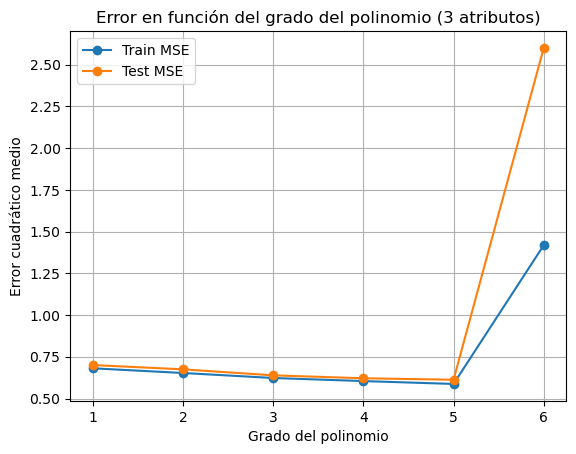

In [78]:
# Luego realizamos la gráfica de los errores para cada polinomio
plt.plot(degrees, errores_train, label='Train MSE', marker='o')
plt.plot(degrees, errores_test, label='Test MSE', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.title('Error en función del grado del polinomio (3 atributos)')
plt.legend()
plt.grid(True)
plt.show()

#### 3. Interprestacion de los resultados

A medida que aumenta el grado del polinomio, el error de entrenamiento (Train MSE) disminuye o se mantiene estable, indicando que el modelo está ajustando cada vez mejor los datos de entrenamiento.  Sin embargo, el error en test (Test MSE) inicialmente disminuye, alcanzando su mínimo alrededor del grado 5 (~0.61), lo que indica que el modelo mejora su capacidad de generalización hasta ese punto. A partir del grado 6 en adelante, el error de test comienza a aumentar drásticamente (por ejemplo, grados 8, 9, 10 con errores muy altos), lo que evidencia sobreajuste: el modelo se ajusta demasiado a las particularidades del conjunto de entrenamiento y pierde capacidad para generalizar a datos nuevos. Se observa además cierta inestabilidad en grados muy altos, con valores de error test muy variables, producto de un modelo muy complejo que se vuelve inestable.

***Comparación con ejercicio anterior (atributo único)***

Al usar 3 atributos en lugar de uno solo, se logra un error en test más bajo (por ejemplo, ~0.61 vs ~0.70 con el atributo único), lo que indica un mejor desempeño del modelo. Esto es esperado porque más atributos relevantes aportan más información útil para explicar la variable objetivo, lo que permite construir un modelo más preciso.  Sin embargo, el riesgo de sobreajuste también crece con la complejidad del modelo, y debe controlarse cuidadosamente.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
